# Progetto PAA
#### Autore:  Federico Schipani - 6185896 - <a href="mailto:federico.schipani@stud.unifi.it">federico.schipani@stud.unifi.it</a>

##### Descrizione del progetto:
In questo notebook verranno effettuate verifiche numeriche su somme infinite dei reciproci dei numeri di Tribonacci. L'articolo da cui è stato preso spunto per questo progetto è <a href = "https://cs.uwaterloo.ca/journals/JIS/VOL19/Kuhapatanakul/kuha7.pdf">Reciprocal Sums of the Tribonacci Numbers</a>.

### Preparazione:
Per prima cosa è necessario importare tutti i pacchetti necessari allo svolgimento di questo progetto:

In [1]:
from sympy import *
from sympy.utilities.lambdify import lambdify, implemented_function
from functools import lru_cache
import sys
import math
sys.setrecursionlimit(10000000)

Per poter stampare i risultati in stile LaTeX è necessario eseguire questa istruzione:

In [2]:
init_printing()

### Introduzione:

I numeri di Fibonacci sono definiti dalla seguente relazione di ricorrenza:

In [3]:
F = Function('F')
n = symbols('n',integer=True)
f = F(n+1)-F(n)-F(n-1)
closedFib = simplify(rsolve(f, F(n), {F(0):0, F(1):1}))
closedFibEq = Eq(F(n), closedFib)
closedFibEq

In [4]:
closedFib1 = Lambda([n], closedFib)
[(n, simplify(fibonacci(n)-closedFib1(n).doit())) for n in range(0,11)]

Definiamo una funzione per il calcolo dei numeri di Tribonacci nel seguente modo:

In [5]:
initial_positive_conditions = {0:0, 1:1, 2:1}


def makePositiveTribonacci(maxsize = None):
    @lru_cache(maxsize)
    def calcPositiveTribonacci(n):
        return calcPositiveTribonacci(n-1)  + calcPositiveTribonacci(n-2) + calcPositiveTribonacci(n-3) if n not in initial_positive_conditions else initial_positive_conditions[n]
    return calcPositiveTribonacci

positiveTribonacci = makePositiveTribonacci(None)
PT = implemented_function(Function('T'), positiveTribonacci)


Per verificare che la funzione calcola effettivamente i numeri di Tribonacci si esegue una verifica numerica:

In [6]:
lambda_tribonacci = lambdify(n, PT(n))
[(n, lambda_tribonacci(n)) for n in range (0,11)]

Ohtsuka e Nakamura hanno derivato alcune formule per somme infinite dei reciproci dei numeri di Fibonacci:
$$\left\lfloor \left( \sum_{k=n}^{\infty}  \frac{1}{F_k } \right)^{-1}\right\rfloor = F_{n-2}\ se\ n\ è\ pari\ e\ n \geq 2,\ F_{n-2}-1\ se\ n\ è\ dispari\ e\ n \geq 1 $$
$$\left\lfloor\left(\sum_{k=n}^{\infty}  \frac{(-1)^k}{F_k}\right)^{-1}\right\rfloor = (-1)^n F_{n+1}-1\ con\ (n>1) $$
$$\left\lfloor\left(\sum_{k=n}^{\infty}  \frac{1}{\sum_{i = 1}^{k} F_i}\right)^{-1}\right\rfloor = F_n -1\ con \ (n \geq 3) $$
In questo notebook verranno verificate formule simili, ma con i numeri di Tribonacci.

### Svolgimento:

La sequenza di numeri di Tribonacci può essere estesa per valori negativi di n, usando la definizione e le condizioni iniziali.
$$F_n = F_{n-1}+F_{n-2}+F_{n-3}$$
Effettuando uno shift di tre posizioni, e cambiando il segno si ottiene:
$$F_{n} = F_{n-3}-F_{n+2}-F_{n+1}$$


In [7]:
initial_negative_conditions = {0:0, -1:0, -2:1}
def makeNegativeTribonacci(maxsize=None):
    @lru_cache(maxsize=maxsize)
    def calcNegativeTribonacci(n):
        return calcNegativeTribonacci(n+3)  - calcNegativeTribonacci(n+2) - calcNegativeTribonacci(n+1) if n not in initial_negative_conditions else initial_negative_conditions[n]
    return calcNegativeTribonacci
negativeTribonacci = makeNegativeTribonacci(maxsize = None)
NT = implemented_function(Function('NT'), negativeTribonacci)
lambda_negative_tribonacci = lambdify(n, NT(n))
[(n*-1, lambda_negative_tribonacci(n*-1)) for n in range (0,11)]

Per comodità definiamo una funzione di Tribonacci unica, sia per i numeri negativi che positivi:

In [8]:
def tribonacci(n):
    if n>=0:
        return positiveTribonacci(n)
    elif n<0:
        return negativeTribonacci(n)
T = implemented_function(Function('T'), tribonacci)
lambda_tribonacci = lambdify(n, T(n))
[(n, lambda_tribonacci(n)) for n in range(-40, 40)]
#SWAG EFFICIENZA

Prima di dimostrare la veridicità delle tre uguaglianze descritte nell'introduzione vengono forniti 3 lemmi.
###### Lemma 1: 
Sia $n$ un intero positivo, allora:
1. $T^{2}_{n} - T_{n-1} T_{n+1} = T_{-(n+1)}$
2. $\sum_{i=1}^{n} T_i = (T_{n+2}+T_{n}-1)/2$ 
3. $T_{n} > T_{-(n+3)} \text{ con } n \geq 3$ 


Effettuiamo una verifica numerica della prima uguaglianza:

In [9]:
lem1_expr1 = T(n)**2 - T(n-1)*T(n+1)
lem1_expr2 = T(-(n+1))
calc_lem1_expr1 = Lambda([n], simplify(lem1_expr1))
calc_lem1_expr2 = Lambda([n], simplify(lem1_expr2))
[(calc_lem1_expr1(n).evalf(chop=True)-calc_lem1_expr2(n).evalf(chop=True)) for n in range(0,40)]

Effettuiamo una verifica numerica della seconda uguaglianza:

In [10]:
lem1_expr4 = (T(n+2)+T(n)-1)/2
i = symbols('i', integer=True)
lem1_expr3 = Sum(T(i), (i, 1, n))
calc_lem1_expr4 = Lambda([n], simplify(lem1_expr4))
calc_lem1_expr3 = Lambda([n], simplify(lem1_expr3))
[(calc_lem1_expr4(n).evalf(chop=True)-calc_lem1_expr3(n).doit().evalf(chop=True)) for n in range(0,40)]

Effettuiamo una verifica numerica del terzo risultato, che ricordiamo valere solo per $n \geq 3$:

In [52]:
[(n, T(n).doit()>T(-(n+3)).doit()) for n in range(3, 1000, 10)]

###### Lemma 2: 
Sia $n > 1$ un intero positivo, allora:
1. $\frac{1}{T_n - T_{n-1} + 1} < \sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1} - 1} $
2. $\frac{1}{(-1)^n(T_n+T_{n-1})+1} < \sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} < \frac{1}{(-1)^n(T_n+T_{n-1})-1}$

Per prima cosa si verifica:
$$\frac{1}{T_n - T_{n-1}+1} < \sum_{k=n}^{\infty} \frac{1}{T_k} $$


In [12]:
lem2_expr1 = 1/(T(n)-T(n-1)+1)
k = symbols('k', integer=True)
lem2_expr2 = Sum(1/T(k), (k, n, oo))
calc_lem2_expr2 = Lambda([n], lem2_expr2)
calc_lem2_expr1 = Lambda([n], lem2_expr1)
[(n, calc_lem2_expr1(n).evalf() < calc_lem2_expr2(n).doit().evalf()) for n in range(2, 60)]

Per via del termine $\sum^{\infty}_{k=n} \frac{1}{T_k}$ non si riesce ad eseguire una verifica numerica soddisfacente, un tentativo per risolvere questo problema potrebbe essere operare con numeri interi manipolando l'espressione. La sommatoria:
$$\sum^{\infty}_{k=n} \frac{1}{T_k}$$
Si può riscrivere, fissando un limite superiore $N$, come:
$$\frac{\prod_{k=n, k \neq n}^{N} T_k + \cdots + \prod_{k=n, k \neq N}^{N} T_k }{\prod_{k=n}^{N} T_k}$$
La disugualianza precedente risulterà quindi:
$$\left(\frac{\prod_{k=n}^{N} T_k}{T_n}  + \cdots + \frac{\prod_{k=n}^{N} T_k}{T_N}\right)(T_n-T_{n-1}+1) \geq \prod_{k=n}^{N} T_k$$
Per velocizzare il calcolo si esegue dal fallimento del precedente in poi:

In [56]:
limit = 100
q = Product(T(k), (k,n,limit))
p = Sum(q/T(k), (k,n,limit))
t = T(n)-T(n-1)+1
calc_t = Lambda([n], t.doit())
calc_p = Lambda([n], p.doit())
calc_q = Lambda([n], q.doit())
[(i, (((calc_p(i).evalf()*calc_t(i).evalf())>=calc_q(i).evalf()))) for i in range(36,70)]

Infine per verificare il primo  risultato basta verificare la seconda parte della disuguaglianza:
$$\sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1} - 1}$$

In [14]:
lem2_expr3 = 1/(T(n)-T(n-1)-1)
calc_lem2_expr3 = Lambda([n], lem2_expr3)
[(n, calc_lem2_expr2(n).doit().evalf() < calc_lem2_expr3(n).evalf()) for n in range(2,60)]

Nella verifica del secondo risultato si segue lo stesso approccio:
$$\frac{1}{(-1)^n(T_n+T_{n-1})+1} < \sum_{k=n}^{\infty} \frac{(-1)^k}{T_k}$$
E poi 
$$\sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} < \frac{1}{(-1)^n(T_n+T_{n-1})-1}$$

In [15]:
lem2_expr4 = 1/(((-1)**n) * (T(n)+T(n-1))+1)
lem2_expr5 =  Sum(((-1)**k)/T(k), (k, n, oo))
calc_lem2_expr5 = Lambda([n], lem2_expr5)
calc_lem2_expr4 = Lambda([n], lem2_expr4)
[(n, calc_lem2_expr4(n).evalf() < calc_lem2_expr5(n).doit().evalf()) for n in range(2, 60)]

In [16]:
lem2_expr6 = 1/(((-1)**n) * (T(n)+T(n-1))-1)
calc_lem2_expr6 = Lambda([n], lem2_expr6)
[(n, calc_lem2_expr6(n).evalf() > calc_lem2_expr5(n).doit().evalf()) for n in range(2, 60)]

Dal 35-esimo indice in poi la seconda diseguaglianza ha gli stessi problemi di precisione della precedente, seguiamo quindi un approccio molto simile. Fissiamo quindi un limite superiore alla sommatoria infinita:
$$\sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} \rightarrow \sum_{k=n}^{N} \frac{(-1)^k}{T_k} $$ 
Ed effettuiamo una semplice trasformazione:
$$\frac{\sum_{k=n}^{N}( (-1)^{k} \prod_{w=n, w\neq k}^{N} T_w)}{\prod_{k = n}^{N} T_k}$$
Verifichiamo quindi:
$$\left(\sum_{k=n}^{N}\left( (-1)^{k} \prod_{w=n, w\neq k}^{N} T_w\right)\right) ((-1)^n(T_n+T_{n-1})-1) < \prod_{k = n}^{N} T_k $$

In [82]:
limit = 100
calc_lem2_expr6_2 = Lambda([n], (((-1)**n) * (T(n)+T(n-1))-1))
q = Product(T(k), (k,n,limit))
p = Sum(q/T(k), (k,n,limit))
calc_p = Lambda([n], p)
calc_q = Lambda([n], q)
[(n, calc_p(n)*calc_lem2_expr6_2(n).evalf() < calc_q(n)) for n in range(35, 60)]

TypeError: can't convert expression to float

###### Lemma 3: 
Sia $n>2$ un intero positivo, allora:
1. Se $T_{-(n+1)} < 0$, allora $\sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1}}$
2. Se $T_{-(n+1)} > 0$, allora $\sum_{k=n}^{\infty} \frac{1}{T_k} > \frac{1}{T_n - T_{n-1}}$

Per verificare i risultati di questo lemma si possono effettuare verifiche numeriche:

Per il primo caso si ha:
Se $T_{-(n+1)} < 0$, allora 
$$\sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1}}$$



Effettuiamo una verifica numerica, per ovvi motivi non si può effettuare una sommatoria di numeri infiniti, quindi ci limiteremo a fissare un limite superiore abbastanza grande.

In [18]:
k = symbols('k', integer=True)
calc_lem3_expr6 = Lambda([n], Sum(1/T(k), (k,n,oo)))
calc_lem3_expr7 = Lambda([n], 1/(T(n)-T(n-1)))
[(n, calc_lem3_expr6(n).doit().evalf() < calc_lem3_expr7(n).evalf() ) for n in range(3,60) if lambda_tribonacci(-(n+1))<0]

Si può ora effettuare una verifica del secondo risultato di questo lemma.
Se $T_{-(n+1)} > 0$, allora $$\sum_{k=n}^{\infty} \frac{1}{T_k} > \frac{1}{T_n - T_{n-1}}$$
 


In [19]:
[(n, calc_lem3_expr6(n).doit().evalf() > calc_lem3_expr7(n).evalf() ) for n in range(3,60) if lambda_tribonacci(-(n+1))>0]

Probabilmente per motivi legati alla precisione di macchina per alcuni valori il risultato non è verificato, prendiamo per esempio il caso in cui $n = 44$ e facciamo vedere che sottraendo la sommatoria all'espressione la differenza diminuisce sempre di più. 

In [20]:
w = symbols('w', integer=True)
calc_lem3_expr8 = Lambda([w], Sum(1/T(k), (k,44,w)))
#IL RISULTATO DELLA SOMMATORIA DOVREBBE ESSERE MAGGIORE, MA PER QUALUNQUE VALORE NON RAGGIUNGE MAI IL RISULTATO SPERATO
[( calc_lem3_expr7(44).evalf() - calc_lem3_expr8(w).doit().evalf() ) for w in range(0, 200, 10)]

Ora siamo pronti per dimostrare le uguaglianze descritte nell'introduzione.
###### Teorema 4:
Sia $n$ un numero intero positivo. Allora:
$$\left\lfloor \left( \sum_{k=n}^{\infty}  \frac{1}{T_k } \right)^{-1}\right\rfloor = 
\begin{cases}
T_n - T_{n-1}\ \text{se}\ T_{-(n+1)} < 0 \\
T_n - T_{n-1} -1\ \text{se}\ T_{-(n+1)} > 0
\end{cases}
$$
Dimostrazione:
Se $n=1$, allora $T_{-2} = 1 > 0$ e $$\sum_{k = 1}^{\infty} \frac{1}{T_k} > \frac{1}{T_1} = 1$$
Effettuiamo una verifica numerica di questo risultato:

In [21]:
k = symbols('k', integer=True)
teo4_expr1 = Sum(1/T(k), (k,1,oo))
teo4_expr1.doit().evalf()


Posso dire che $$0<\left(\sum_{k = 1}^{\infty} \frac{1}{T_k}\right)^{-1} < 1$$
Prendendo la parte intera inferiore di questo numero ottengo:
$$\left\lfloor \left(\sum_{k = 1}^{\infty} \frac{1}{T_k}\right)^{-1} \right\rfloor = 0 = T_1 - T_0 -1$$
Effettuiamo una verifica numerica di questo risultato:

In [22]:
teo4_expr2 = teo4_expr1**(-1)
math.floor(teo4_expr2.doit().evalf()) ==( T(1).evalf() - T(0).evalf() -1)

True

La prova per $n=2$ è analoga. In questo caso ho $T_{-3} = -1$, quindi si rientra nel primo caso.
$$\left(\sum_{k = 2}^{\infty} \frac{1}{T_k}\right) > \frac{1}{T_2} = 1$$
$$0 <\left(\sum_{k = 2}^{\infty} \frac{1}{T_k}\right)^{-1}  < 1$$
$$\left\lfloor \left(\sum_{k = 2}^{\infty} \frac{1}{T_k}\right)^{-1} \right\rfloor = 0 = T_2 - T_1$$
Effettuiamo una verifica numerica di questo risultato:

In [23]:
teo4_expr3 = Sum(1/T(k), (k,2,oo))
teo4_expr3.doit().evalf() > T(2).evalf()

In [24]:
teo4_expr4 = Sum(1/T(k), (k,2,oo))**(-1)
math.floor(teo4_expr4.doit().evalf()) == T(2).evalf() - T(1).evalf()

True

Dimostriamo ora per il caso generico in cui $n>2$. Usando il Lemma 2 ed il Lemma 3 si ottiene:
$$\frac{1}{T_n - T_{n-1} + 1} < \sum_{k =n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1}}\ \text{se}\ T_{-(n+1)} < 0$$
Oppure:
$$\frac{1}{T_n - T_{n-1}} < \sum_{k =n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1} - 1}\ \text{se}\ T_{-(n+1)} > 0$$
Allora si ottiene il risultato finale:
$$\left\lfloor \left( \sum_{k=n}^{\infty}  \frac{1}{T_k } \right)^{-1}\right\rfloor = 
\begin{cases}
T_n - T_{n-1}\ \text{se}\ T_{-(n+1)} < 0 \\
T_n - T_{n-1} -1\ \text{se}\ T_{-(n+1)} > 0
\end{cases}
$$
Verifichiamo numericamente tutte e 3 le espressioni:

Iniziamo dal caso in cui $T_{-(n+1)}<0$

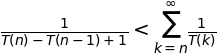

In [25]:
calc_teo4_expr5 = Lambda([n], Sum(1/T(k), (k,n,oo)))
calc_teo4_expr6 = Lambda([n], 1/(T(n)-T(n-1)+1))
1/(T(n)-T(n-1)+1) < Sum(1/T(k), (k,n,oo))


In [26]:
[(n, calc_teo4_expr6(n).evalf() < calc_teo4_expr5(n).doit().evalf()) for n in range(0, 50) if T(-(n+1)).evalf() < 0]

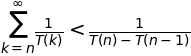

In [27]:
calc_teo4_expr7 = Lambda([n], 1/(T(n)-T(n-1)))
Sum(1/T(k), (k,n,oo)) < 1/(T(n)-T(n-1))


In [28]:
[(n, calc_teo4_expr5(n).evalf() < calc_teo4_expr7(n).doit().evalf()) for n in range(0, 50) if T(-(n+1)).evalf() < 0]

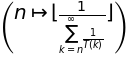

In [29]:
calc_teo4_expr8 = Lambda([n], floor((Sum(1/T(k), (k,n,oo))**(-1))))
calc_teo4_expr8

In [30]:
#Con strict = true nel evalf restituisce eccezione
[(n, calc_teo4_expr8(n).evalf(), (T(n).evalf()-T(n-1).evalf()), (T(n).evalf()-T(n-1).evalf()) ==calc_teo4_expr8(n).evalf() ) for n in range(0, 50) if T(-(n+1)).evalf() < 0]

[(2, 0, 0, True),
 (5, 3.00, 3.00000000000000, True),
 (8, 20.00, 20.0000000000000, True),
 (11, 125.0, 125.000000000000, True),
 (14, 778.00, 778.000000000000, True),
 (17, 4841.00, 4841.00000000000, True),
 (19, 16377.0, 16377.0000000000, True),
 (20, 30122.00, 30122.0000000000, True),
 (22, 101903.0, 101902.000000000, False),
 (23, 187429.0, 187427.000000000, False),
 (25, 634081.00, 634061.000000000, False),
 (26, 1166257.0, 1166220.00000000, False),
 (28, 3945524.00, 3945294.00000000, False),
 (31, 24549432.00, 24548655.0000000, False),
 (34, 152753016.0, 152748176.000000, False),
 (37, 950494656.00, 950439251.000000, False),
 (40, 5914069964.00, 5913882532.00000, False),
 (42, 0, 20006521300.0000, False),
 (43, 0, 36797729645.0000, False),
 (45, 0, 124485827703.000, False),
 (46, 0, 228965134106.000, False),
 (48, 0, 774583500376.000, False),
 (49, 0, 1424681173049.00, False)]

Proviamo ora il caso in cui $T_{-(n+1)}>0$.
$$\frac{1}{T_n - T_{n-1}} < \sum_{k =n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1} - 1}\ \text{se}\ T_{-(n+1)} > 0$$

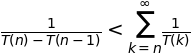

In [31]:
 1/(T(n)-T(n-1)) < Sum(1/T(k), (k,n,oo))

In [32]:
[(n, calc_teo4_expr7(n).evalf() < calc_teo4_expr5(n).doit().evalf()) for n in range(0, 50)  if T(-(n+1)).evalf() > 0]

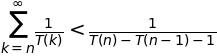

In [33]:
Sum(1/T(k), (k,n,oo)) < 1/(T(n)-T(n-1)-1)

In [34]:
calc_teo3_expr9 = Lambda([n], 1/(T(n)-T(n-1)-1))
[(n, calc_teo4_expr5(n).doit().evalf() < calc_teo3_expr9(n).evalf()) for n in range(0, 50)  if T(-(n+1)).evalf() > 0]

In [35]:
[(n, calc_teo4_expr8(n).evalf(), (T(n).evalf(maxn=3000)-T(n-1).evalf() -1), (T(n).evalf()-T(n-1).evalf() - 1) ==calc_teo4_expr8(n).evalf() ) for n in range(0, 50) if T(-(n+1)).evalf() > 0]


[(1, 0, 0, True),
 (4, 1.0, 1.00000000000000, True),
 (6, 5.00, 5.00000000000000, True),
 (7, 10.0, 10.0000000000000, True),
 (9, 36.00, 36.0000000000000, True),
 (10, 67.00, 67.0000000000000, True),
 (12, 229.0, 229.000000000000, True),
 (13, 422.00, 422.000000000000, True),
 (15, 1430.0, 1430.00000000000, True),
 (18, 8903.00, 8903.00000000000, True),
 (21, 55403.00, 55402.0000000000, False),
 (24, 344738.00, 344731.000000000, False),
 (27, 2145081.00, 2145012.00000000, False),
 (29, 7256757.00, 7256526.00000000, False),
 (30, 13347257.0, 13346833.0000000, False),
 (32, 45153446.00, 45152015.0000000, False),
 (33, 83050136.00, 83047504.0000000, False),
 (35, 280956600.00, 280947696.000000, False),
 (36, 516773501.00, 516743377.000000, False),
 (38, 1748185730.0, 1748130325.00000, False),
 (39, 3215414859.00, 3215312954.00000, False),
 (41, 10877513242.0, 10877325812.0000, False),
 (44, 0, 67681576757.0000, False),
 (47, 0, 421132538566.000, False)]

Il Teorema 4 appena descritto non vale nel caso in cui $T_{-(n+1)} = 0$, questo si verifica per esempio quando $n=3$. 
Visto che: $$\sum_{k=3}^{\infty} \frac{1}{T_k} > \sum_{k=1}^{\infty} \frac{1}{2^k} = 1$$
Abbiamo:
$$\left\lfloor\left(\sum_{k=3}^{\infty} \frac{1}{T_k}\right)^{-1}\right\rfloor = 0$$
Proviamo numericamente le due identità mostrate:

In [36]:
(calc_teo4_expr5(3).evalf(), Sum(1/(2**k), (k, 1, oo)).evalf())
#...

In [37]:
math.floor(((calc_teo4_expr5(3).doit().evalf())**(-1)))

Si può osservare che per $1 \leq n \leq 19$ se $ 3|n $, allora il valore di $T_{-n}$ è negativo. Quindi abbiamo il seguente corollario:
###### Corollario 5:
Sia $n < 19$ un intero positivo, con $n \neq 16$. Allora:
$$\left\lfloor\left(\sum_{k=n}^{\infty} \frac{1}{T_k}\right)^{-1}\right\rfloor = 
\begin{cases}
T_n - T_{n-1}\ \text{se}\ 3|(n+1) \\
T_n - T_{n-1} -1\ \text{se}\ \neg (3|(n+1))
\end{cases}$$
Effettuiamo una verifica numerica in entrambi i casi:

In [38]:
[(n, math.floor((calc_teo4_expr5(n)**(-1)).doit().evalf()) == T(n).evalf()-T(n-1).evalf()) for n in range(0,19) if (n+1)%3==0]


[(2, True), (5, True), (8, True), (11, True), (14, True), (17, True)]

In [39]:
[(n, math.floor((calc_teo4_expr5(n)**(-1)).doit().evalf()) == T(n).evalf()-T(n-1).evalf()-1) for n in range(1,19) if (n+1)%3!=0]


[(1, True),
 (3, True),
 (4, True),
 (6, True),
 (7, True),
 (9, True),
 (10, True),
 (12, True),
 (13, True),
 (15, True),
 (16, False),
 (18, True)]

Come si può notare l'uguaglianza vale per tutti i casi tranne che per $n=16$.

###### Teorema 6:
Sia $n>1$ un intero positivo, allora:

$$\left\lfloor\left(\sum_{k=n}^{\infty} \frac{(-1)^k)}{T_k}\right)^{-1}\right\rfloor = 
\begin{cases}
(-1)^n (T_n + T_{n-1})\ \text{se}\ (-1)^n T_{-(n+1)} > 0 \\
(-1)^n (T_n + T_{n-1} -1)\ \text{se}\ (-1)^n T_{-(n+1)} < 0
\end{cases}$$

Dimostrazione:

Osserviamo che
$$\frac{1}{(-1)^{n}(T_n+T_{n-1})} - \frac{(-1)^n}{T_n} - \frac{1}{(-1)^{n+1}(T_{n+1}+T_{n})} = 
\frac{(-1)^{n}T_{-(n+1)}}{T_{n}(T_{n}+T_{n-1})(T_{n+1}+T_{n})}$$
Effettuiamo una prova numerica di questa uguaglianza:

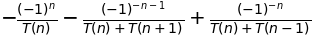

In [40]:
teo6_expr1 = 1/(((-1)**n)*(T(n)+T(n-1))) - ((-1)**n)/T(n) - (1/((-1)**(n+1)*(T(n+1)+T(n))))
teo6_expr1

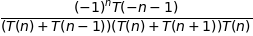

In [41]:
teo6_expr2 = ((-1)**n * T(-(n+1)))/(T(n)*(T(n)+T(n-1))*(T(n+1)+T(n)))
teo6_expr2

In [42]:
calc_teo6_expr1 = Lambda([n], teo6_expr1)
calc_teo6_expr2 = Lambda([n], teo6_expr2)
[(calc_teo6_expr1(n).evalf(chop=True) - calc_teo6_expr2(n).evalf(chop=True)) for n in range(2, 40)]

Ora dividiamo i due casi, il primo in cui $(-1)^nT_{-(n+1)} > 0$, ed il secondo in cui $(-1)^nT_{-(n+1)} < 0$.

Se $(-1)^nT_{-(n+1)} > 0$:

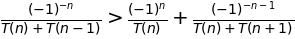

In [43]:
teo6_expr3 = 1/((-1)**(n)*(T(n)+T(n-1)))
teo6_expr4 = ((-1)**n)/T(n) + 1/((-1)**(n+1)*(T(n+1)+T(n)))
teo6_expr3 > teo6_expr4

In [44]:
calc_teo6_expr3 = Lambda([n], teo6_expr3)
calc_teo6_expr4 = Lambda([n], teo6_expr4)
#STESSO PROBLEMA DOPO CIRCA 40
[(n, calc_teo6_expr3(n).evalf() > calc_teo6_expr4(n).evalf()) for n in range(2, 50) if (((-1)**n)*T(-n-1)).evalf()>0]

Otteniamo quindi:
$$\sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} < \frac{1}{(-1)^n(T_n+T_{n-1})}$$

In [45]:
calc_teo6_expr5 = Lambda([n], Sum(((-1)**k)/(T(k)), (k,n,oo)))
calc_teo6_expr6 = Lambda([n], 1/((-1)**n * (T(n)+T(n-1))))
# :'(
[(n, calc_teo6_expr5(n).evalf() < calc_teo6_expr6(n).evalf()) for n in range(2, 50) if (((-1)**n)*T(-n-1)).evalf()>0  ]

Il secondo caso, ovvero quello in cui $(-1)^nT_{-(n+1)} < 0$ è mostrato di seguito:
$$\sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} > \frac{1}{(-1)^n(T_n+T_{n-1})}$$

In [46]:
[(n, calc_teo6_expr5(n).evalf() > calc_teo6_expr6(n).evalf()) for n in range(2, 50) if (((-1)**n)*T(-n-1)).evalf()<0  ]

Usando il secondo risultato del Lemma 2 si ottiene il risultato finale:
$$\left\lfloor\left(\sum_{k=n}^{\infty} \frac{(-1)^k)}{T_k}\right)^{-1}\right\rfloor = 
\begin{cases}
(-1)^n (T_n + T_{n-1})\ \text{se}\ (-1)^n T_{-(n+1)} > 0 \\
(-1)^n (T_n + T_{n-1} -1)\ \text{se}\ (-1)^n T_{-(n+1)} < 0
\end{cases}$$
Su cui si effettua una verifica numerica:

In [47]:
teo6_expr7 = floor(Sum((-1)**k/T(k), (k,n,oo))**-1)
calc_teo6_expr7 = Lambda([n], teo6_expr7)
calc_teo6_expr8 = Lambda([n], ((-1)**n)*(T(n)+T(n-1)))
[(n, (calc_teo6_expr7(n).evalf()-calc_teo6_expr8(n).evalf()))  for n in range(2, 50) if (((-1)**n)*T(-n-1)).evalf()>0]
#EVBB

In [48]:
calc_teo6_expr9 = Lambda([n], ((-1)**n)*(T(n)+T(n-1))-1)
[(n, (calc_teo6_expr7(n).evalf()-calc_teo6_expr9(n).evalf()))  for n in range(2, 50) if (((-1)**n)*T(-n-1)).evalf()<0]
#EVBB

###### Teorema 7:


Sia $n \geq 4$ un intero positivo, allora:
$$\left\lfloor\left(\sum_{k=n}^{\infty} \frac{1}{\sum_{i = 1}^{k} T_i}\right)^{-1}\right\rfloor = T(n)-1$$
Dimostrazione:

Usando il secondo punto del Lemma 1 possiamo scrivere questo.
$$\frac{1}{T_n} < \sum_{k=n}^{\infty}\frac{2}{T_{k+2}+T_k-1} < \frac{1}{T_n-1}\qquad n\geq4 $$
Consideriamo ora $$\left(\frac{1}{T_n-1} - \frac{2}{T_{n+2}+T_{n}-1} - \frac{1}{T_{n+1}+1}\right) > 0$$
Quindi abbiamo:
$$\frac{2}{T_{n+2}+T_{n}-1} < \frac{1}{T_n-1} -\frac{1}{T_{n+1}+1} $$
Verifichiamo:

In [49]:
teo7_expr1 = 2/(T(n+2)+T(n)-1)
calc_teo7_expr1 = Lambda([n],teo7_expr1)
calc_teo7_expr2 = Lambda([n],1/(T(n)-1) - 1/T(n+1))
[(n, calc_teo7_expr1(n).evalf() < calc_teo7_expr2(n).evalf()) for n in range(4, 50)]

Perciò abbiamo:
$$\sum_{k=n}^{\infty}\frac{2}{T_{k+2}+T_k-1} < \frac{1}{T_n-1} $$

In [50]:
calc_teo7_expr3 = Lambda([n],Sum(calc_teo7_expr1(k),(k,n,oo)))
calc_teo7_expr4 = Lambda([n], 1/(T(n)-1))

[(n, calc_teo7_expr3(n).doit().evalf() < calc_teo7_expr4(n).evalf()) for n in range(4,50)]

Però avremo anche che:
$$\frac{1}{T_n} - \frac{2}{T_{n+2} + T_{n} -1 } - \frac{1}{T_{n+1}} < 0 \qquad n\geq 4$$
Da cui deriva:
$$\sum_{k=n}^{\infty}\frac{2}{T_{k+2} + T_{k} -1 } > \frac{1}{T_n} $$

In [51]:
[(n, calc_teo7_expr3(n).doit().evalf() > (T(n)**-1).evalf()) for n in range(4,50)]
# :'''''''(